# From Machine Learning to Neural Networks

In the first module of this course, we explored the problem of image reconstruction using measurements acquired through linear operators. Now, we’ll tackle the same problem from a different angle—using **neural networks** to solve the inverse problem of recovering an unknown image from (noisy) measurements.

We’ll start this module by introducing some fundamental Machine Learning concepts, including linearity, parameters, and regression. Then, we’ll dive into neural networks as a specialized branch of Machine Learning, highlighting their key properties. The next section will focus on implementation.

```{image} /imgs/hybrid.png
:width: 400px
:align: center
```

## Basics of Machine Learning
A learning problem involves extracting knowledge from a dataset of $N$ points:

$$
\{ (x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), \dots, (x^{(N)}, y^{(N)}) \}
$$

where each pair $(x^{(i)}, y^{(i)})$ consists of an input and its corresponding output. Think of the input data $x^{(i)} \in \mathbb{R}^d$ as the available information and the output data $y^{(i)} \in \mathbb{R}^s$ as the quantity we want to predict. The input dimension, $d$, represents the number of input features, while the output dimension, $s$, corresponds to the number of variables we aim to predict. To simplify things, we usually represent these as vectors of size $d$ and $s$, respectively.

For example, Machine Learning is widely used to predict house prices based on property characteristics. Suppose we have a dataset where each house is described by features such as:  

- $x_1$: Square footage  
- $x_2$: Number of bedrooms  
- $x_3$: Number of bathrooms  
- $x_4$: Distance to the city center  
- $x_5$: Age of the house  

The goal is to predict the selling price $y$ of a house given its features. Here, the input $x^{(i)} \in \mathbb{R}^5$ represents a vector of property attributes, and the output $y^{(i)} \in \mathbb{R}$ is the house price.  

A Machine Learning model, such as **linear regression**, learns a function $f_\Theta$ that maps inputs to outputs:  

$$
y = f_\Theta(x_1, x_2, x_3, x_4, x_5).
$$

Initially, the model **does not know** how these features influence the price. By **training** on past sales data, it finds patterns and estimates parameters (or weights) that best fit the data. Once trained, the model can predict the price of new houses that were not in the dataset.  

This simple example illustrates the core idea of supervised learning: using past data to make future predictions. More generally, a Machine Learning model can be seen as a mathematical function that maps input features to an output of interest.

```{warning}
This setup assumes that all data is represented as real numbers (since both $x^{(i)}$ and $y^{(i)}$ are real-valued vectors). Handling non-numeric data is beyond the scope of this course, but for those interested, we recommend looking into *embedding* techniques for categorical variables.
```

### Mathematical Formulation of Machine Learning Models  

At its core, a Machine Learning (ML) model is a function

$$
f_\Theta: \mathbb{R}^d \to \mathbb{R}^s
$$

that maps an input vector of length $d$ to an output vector of length $s$. The choice of $s$ depends on the application:

* If the model is used for classification, where an input belongs to one of $k$ categories, then $s = k$.
* If the model is used for regression, $s$ corresponds to the number of predicted values.
* If the model is used for image reconstruction, $s$ typically represents the number of pixels in the reconstructed image.

The model's knowledge is encoded in the vector $\Theta$, which represents its parameters. To better understand the role of parameters in an ML model, let's start with a simple example: Linear Regression.

Consider a basic model $f_\Theta$ with just two parameters, $\Theta_1$ and $\Theta_2$:

$$
f_\Theta(x) = \Theta_1 + \Theta_2 x.
$$

This equation describes a straight line where $\Theta_1$ is the intercept and $\Theta_2$ is the slope.

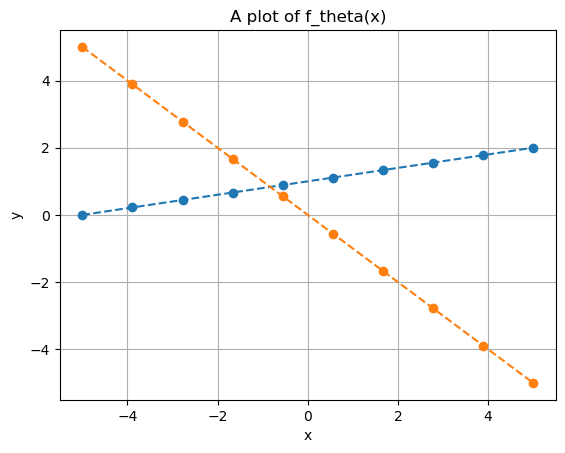

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameterized function f
def f(theta, x):
    return theta[0] + theta[1] * x

# Choose two different values for the parameters
theta = (1, 0.2)
theta2 = (0, -1)

# Visualize the model prediction in the range [-5, 5]
xx = np.linspace(-5, 5, 10)
yy = f(theta, xx)
yy2 = f(theta2, xx)

plt.plot(xx, yy, 'o--')
plt.plot(xx, yy2, 'o--')
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.title("A plot of f_theta(x)")
plt.show()

Think of $x$ as the input data that we use to predict an output $y$. Notice how different choices of $\Theta$ can lead to vastly different predictions.

Now, let's overlay the available data on the same plot:

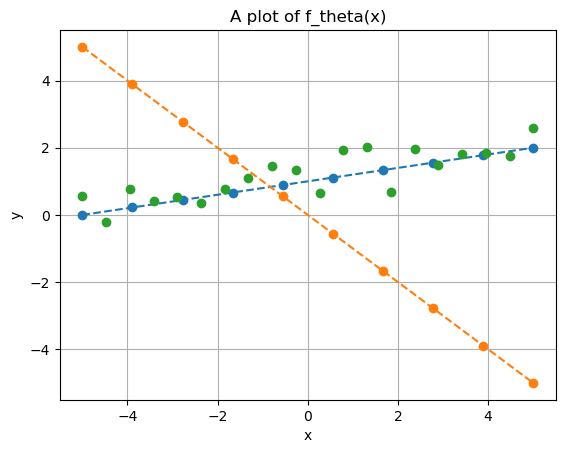

In [2]:
# Define synthetic datapoints
x_data = np.linspace(-5, 5, 20)
y_data = 1 + 0.2 * x_data + np.random.normal(0, 0.5, x_data.shape)

# Plot
plt.plot(xx, yy, 'o--')
plt.plot(xx, yy2, 'o--')
plt.plot(x_data, y_data, 'o')
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.title("A plot of f_theta(x)")
plt.show()

*Which of the two straight lines better fits the given data?* 
Clearly, the blue line—parameterized by $\Theta=(1,0.2)$. In fact, if we check the code used to generate the data, we’ll see that $(1,0.2)$ are the exact parameters that define $y^{(i)}.

This highlights two fundamental characteristics common to almost all ML models:

* Different choices of $\Theta$ lead to *very different* predictions.
* Given a training set, some parameter choices are better than others, and usually, there is one that is *optimal*. A good model should at least approximate this optimal choice.

The process of finding the optimal parameters for an ML model based on a training set is called *training*. We’ll revisit this topic later when discussing how models are typically trained.

### Linearity

In the example above, we assumed both the input and output dimensions were $d = 1$ and $s = 1$. However, we can easily generalize a linear regression model to higher dimensions ($d > 1$, $s > 1$) using the general linear model:

$$
f_\Theta(x) = W x + b
$$

where the parameters $\Theta = \{ W, b \}$ have dimensions $W \in \mathbb{R}^{s \times d}$ and $b \in \mathbb{R}^s$. This means the total number of parameters to be learned is $s(d+1)$, which grows linearly with the input and output dimensions.

When $d > 1$ and $s > 1$, we can no longer visualize the model’s output in a simple plot, as it would require at least four dimensions.

While linear models have several useful properties (which are beyond the scope of this course), their **expressivity**—i.e., their ability to approximate complex outputs—is quite limited. A linear model can only represent *linear functions* (such as straight lines and planes), making it incapable of even approximating simple functions like $\sin(x)$. This limitation makes linear models impractical for handling complex data, such as images or natural language.


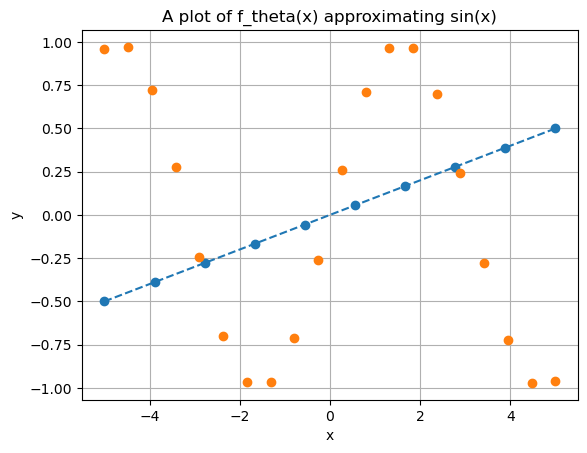

In [3]:
# Define synthetic datapoints
x_data = np.linspace(-5, 5, 20)
y_data = np.sin(x_data)

# Create a linear model approximation
xx = np.linspace(-5, 5, 10)
theta = (0, 0.1)
yy = f(theta, xx)

# Plot
plt.plot(xx, yy, 'o--')
plt.plot(x_data, y_data, 'o')
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.title("A plot of f_theta(x) approximating sin(x)")
plt.show()

To this aim, multiple ML algorithms have been proposed in the literature, with the most successful being Polynomial Regression, Support Vector Machines (SVM), Random Forest (RF), and XGBoost.  

However, while these models outperform linear regression in predictive performance, none of them are expressive enough to accurately approximate highly complex data, as required for image reconstruction tasks.  

## Neural Networks

A neural network is a specific type of Machine Learning (ML) model that has gained significant relevance in recent years due to several factors, including:

- The exponential increase in computational power, particularly with GPUs, which enable extreme *parallelization*—a key advantage of neural networks over other Artificial Intelligence (AI) methods.
- The vast amount of data available, largely thanks to the internet.

In this section, we will provide a high-level overview of neural networks. We will then dive deeper into neural networks specifically designed for image processing.  

For a more in-depth understanding of neural networks, we recommend referring to the course by Professor Andrea Asperti which will be held at the beginning of the second year of this Master Degree.  

### Stacking Multiple Linear Functions  

The basic idea behind neural networks is fairly simple: linear models are efficient but not expressive enough, so why not stack multiple linear models on top of each other to improve expressivity?  

For example, consider two linear models:  

$$
f^1_{\Theta^1}(x) = W^1 x + b^1, \\
f^2_{\Theta^2}(x) = W^2 x + b^2.
$$

Now, let's define a new model, $f_\Theta(x)$, by chaining these two functions so that the output of the first model serves as the input to the second:  

$$
f_\Theta(x) := (f_{\Theta^2} \circ f_{\Theta^1})(x) = f_{\Theta^2} ( f_{\Theta^1} (x)).
$$

Does this give us a more flexible model? **Unfortunately, no.**  

It's easy to show that:  

$$
\begin{aligned}
f_\Theta(x) &= f_{\Theta^2} ( f_{\Theta^1} (x)) = f_{\Theta^2} (W^1 x + b^1) \\  
&= W^2(W^1 x + b^1) + b^2 = W^2 W^1 x + W^2b^1 + b^2.
\end{aligned}
$$

If we rename $W := W^2 W^1$ and $b := W^2b^1 + b^2$, we obtain:  

$$
f_\Theta(x) = W x + b.
$$

This proves that *stacking multiple linear models still results in a linear model*. This isn't surprising, as closure under composition is a fundamental property of linear functions.  

### Non-linear Activation Functions

To build a model that is more expressive than a linear model, we can't just stack multiple linear models. We also need something to break the linearity. In neural networks, the solution is quite simple: we insert non-linear functions between the linear models to introduce non-linearity.

Consider, for example, a simple function like:  

$$
\rho(x) = \max(0, x),
$$  

The plot of this function looks as follows:

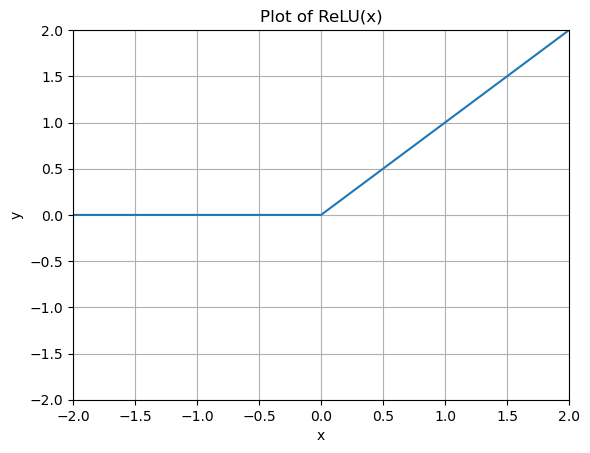

In [4]:
# Define ReLU
def ReLU(x):
    return np.maximum(0, x)

# Define x
x = np.linspace(-5, 5, 21)
y = ReLU(x)

# Plot
plt.plot(x, y, '-')
plt.grid()
plt.title("Plot of ReLU(x)")
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()

Re-define the model $f_\Theta$ as above, but inserting $\rho(x)$ between the two linear models $f_{\Theta^1}$ and $f_{\Theta^2}$:

$$
f_{\Theta}(x) := f_{\Theta^2} ( \rho (f_{\Theta^1} (x))) = W^2(\rho(W^1x + b^1)) + b^2.
$$

Surprisingly, while this simple modification doesn't seem to drastically change the structure of the stacked linear model discussed earlier, it introduces an incredible property: $f_\Theta(x)$ can approximate *arbitrarily well* any continuous function, thus exhibiting the **Universal Approximation** property. This model, originally called the Multi-layer Perceptron (MLP) due to its layered structure, is the simplest version of a *neural network*.

As we will see in the following, more advanced versions of neural networks can be obtained by:
- Stacking more linear models (always placing a non-linear function in between them),
- Changing the non-linear function used,
- Limiting the structure of the parameter matrices $W^l$ to allow for more efficient computation (this is particularly important for image reconstruction).

### Notations

To conclude this introductory section, we provide the most common naming notation for neural network models. First, note that the formal description of the MLP given above is equivalent to the classical visualization shown in the figure below.

In particular, any neural network can be graphically represented as a layered graph, where each node is called a *neuron*. The first layer (depicted in blue in the figure) is called the *input layer*, and it contains a number of neurons equal to the input dimension $d$ of our data. Connected to the input layer is an intermediate layer called the *hidden layer*, whose number of neurons $H$ (called the *hidden dimension*) is a user-defined parameter. The name *hidden layer* comes from the fact that the values of its neurons are not accessible from the outside, as we usually only access its input and output. Each neuron in the hidden layer, $z_i$, is obtained by a linear transformation of the input data, i.e.

$$
z_i = w_i \cdot x + b_i,
$$

where $w_i$ and $b_i$ are the neuron-specific parameters, usually called *weights* and *biases*, respectively. These are represented as the edges connecting the neurons from the input layer to $z_i$. The hidden layer is then processed by the non-linear activation function $\rho$, mapping each neuron to the corresponding $h_i = \rho(z_i)$.

Finally, another linear transformation maps $h_i$ to the output neuron $y$, which defines the *output layer* of our network.

```{image} /imgs/MLP.png
:width: 400px
:align: center
```

## Deep Neural Networks

The simple neural network architecture described above, since its debut in 1958, has evolved in multiple, different directions. One of the first and crucial evolutions was the adoption of multiple hidden layers. Indeed, note that we can simply iterate the process used to build the single hidden layer architecture above to define multiple hidden layers, each taking as input the output of the previous hidden layer and employing the classical linear transformation + non-linear activation, possibly improving the expressivity of the model.

Thanks to the large increase in computational power, modern neural networks employ hundreds of hidden layers. Let $L$ be the number of hidden layers in a deep neural network, so that the $l$-th layer has $H_l$ neurons. Usually, $L$ is referred to as the *depth* of the model, while the largest number of neurons among hidden layers, i.e. $\max_{l} H_l$, is usually called the *width* of the model.

A neural network with a lot of hidden layers is therefore a *deep* neural network, which explains the reason behind its name. The set of algorithms based on deep neural networks is usually referred to as **Deep Learning**.

### Activation Functions: Beyond ReLU

As already discussed, another line of research in modern neural networks is the exploration of different activation functions. Here, we report a few of them, mainly as a reminder. We will investigate their properties in the next few sections.

* **ReLU**: $ReLU(x) = \max \{0, x \}$;
* **Sigmoid**: $\sigma(x) = \frac{\exp{(x)}}{1 + \exp{(x)}}$;
* **Tanh**: $\tanh(x) = \frac{\exp{(x)} - \exp{(-x)}}{\exp{(x)} + \exp{(-x)}}$;
* **SiLU**: $SiLU(x) = x \sigma(x)$;
* **LeakyReLU**: $LReLU(x) = \begin{cases} x & \text{ if } x > 0, \\ ax & \text{ otherwise;} \end{cases}$
* **Softmax**: $softmax(x)_i = \frac{\exp{(x_i)}}{\sum_{j=1}^d \exp{\exp{(x_j)}}}$.

In the following, we provide a Python implementation of these activation functions, along with the corresponding plots in the range $[-2, 2]$.

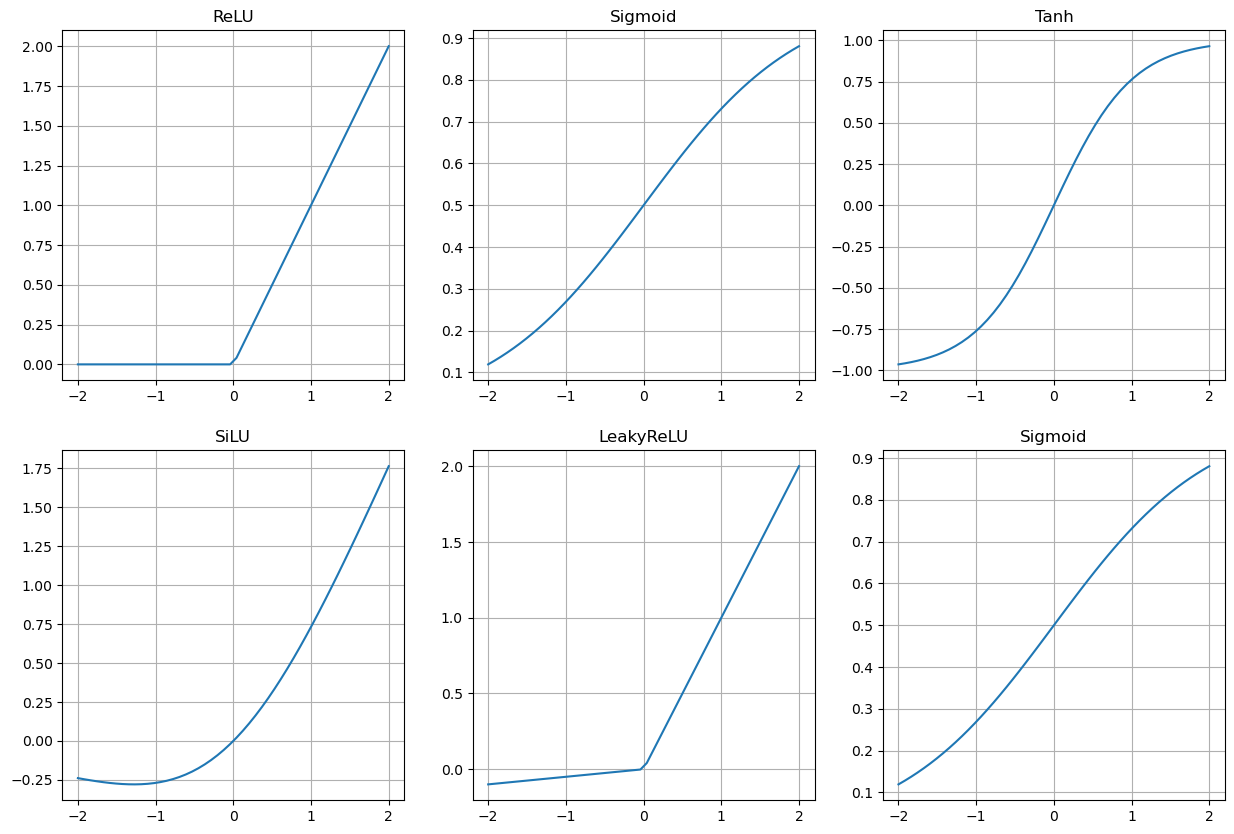

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def ReLU(x):
    return np.maximum(0, x)

def sigmoid(x):
    return np.exp(x) / (1 + np.exp(x))

def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

def SiLU(x):
    return x * sigmoid(x)

def LReLU(x):
    y = np.zeros_like(x)
    a = 0.05

    y[x > 0] = x[x > 0]
    y[x < 0] = a * x[x < 0]
    return y

# Plots
xx = np.linspace(-2, 2, 50)

plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
plt.plot(xx, ReLU(xx))
plt.title("ReLU")
plt.grid()

plt.subplot(2, 3, 2)
plt.plot(xx, sigmoid(xx))
plt.title("Sigmoid")
plt.grid()

plt.subplot(2, 3, 3)
plt.plot(xx, tanh(xx))
plt.title("Tanh")
plt.grid()

plt.subplot(2, 3, 4)
plt.plot(xx, SiLU(xx))
plt.title("SiLU")
plt.grid()

plt.subplot(2, 3, 5)
plt.plot(xx, LReLU(xx))
plt.title("LeakyReLU")
plt.grid()

plt.subplot(2, 3, 6)
plt.plot(xx, sigmoid(xx))
plt.title("Sigmoid")
plt.grid()

plt.show()

In the next chapter, we will learn how to implement deep neural networks in Python using PyTorch.